In [131]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from tqdm.autonotebook import tqdm

from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from ipywidgets import IntProgress
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df=pd.read_csv('/Users/admin/mouse_movement/updated_mouse_data.csv',index_col='Unnamed: 0', 
               parse_dates=['time']).sort_values(by=['time'])

/Users/admin/opt/anaconda3/envs/ml/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [28]:
df.head()

,type,time,updatedAt,session_id,coordinates_X,coordinates_Y
69584,scroll,2020-08-06 13:17:34.237000+00:00,2020-08-07T13:17:40.951Z,08c9433a-bd4c-4c4b-826a-7ce824aaa9f0,0.000000,0.000000
69585,touchstart,2020-08-06 13:17:41.052000+00:00,2020-08-07T13:17:40.951Z,08c9433a-bd4c-4c4b-826a-7ce824aaa9f0,431.400848,659.466064
69586,touchmove,2020-08-06 13:17:41.075000+00:00,2020-08-07T13:17:40.951Z,08c9433a-bd4c-4c4b-826a-7ce824aaa9f0,432.066589,645.476990
69587,touchmove,2020-08-06 13:17:41.131000+00:00,2020-08-07T13:17:40.951Z,08c9433a-bd4c-4c4b-826a-7ce824aaa9f0,440.055511,604.175964
69588,touchmove,2020-08-06 13:17:41.167000+00:00,2020-08-07T13:17:40.951Z,08c9433a-bd4c-4c4b-826a-7ce824aaa9f0,446.047211,562.208801


In [29]:
#df['time']=df['time'].astype('datetime64')

# def get_derivatives(data):
    

In [35]:
#df = pd.read_csv('part_df', parse_dates=['time']).sort_values(by=['time'])


df['dt'] = df.groupby(['session_id'])['time'].diff()
df['dx'] = df.groupby(['session_id'])['coordinates_X'].diff()

df['dy'] = df.groupby(['session_id'])['coordinates_Y'].diff()


In [47]:
#df['dt']=[i.total_seconds() for i in df['dt']]
df['dt']

69584        NaN
69585      6.815
69586      0.023
69587      0.056
69588      0.036
           ...  
5189095    0.053
5189096    0.016
5189097    0.160
5189098    0.012
5189099    4.644
Name: dt, Length: 5189100, dtype: float64

In [48]:
df['dx']=df['dx']/df['dt']

df['dy']=df['dy']/df['dt']


In [49]:
df.head()

,type,time,updatedAt,session_id,coordinates_X,coordinates_Y,dt,dx,dy
69584,scroll,2020-08-06 13:17:34.237000+00:00,2020-08-07T13:17:40.951Z,08c9433a-bd4c-4c4b-826a-7ce824aaa9f0,0.000000,0.000000,NaN,NaN,NaN
69585,touchstart,2020-08-06 13:17:41.052000+00:00,2020-08-07T13:17:40.951Z,08c9433a-bd4c-4c4b-826a-7ce824aaa9f0,431.400848,659.466064,6.815,63.301665,96.766847
69586,touchmove,2020-08-06 13:17:41.075000+00:00,2020-08-07T13:17:40.951Z,08c9433a-bd4c-4c4b-826a-7ce824aaa9f0,432.066589,645.476990,0.023,28.945259,-608.220639
69587,touchmove,2020-08-06 13:17:41.131000+00:00,2020-08-07T13:17:40.951Z,08c9433a-bd4c-4c4b-826a-7ce824aaa9f0,440.055511,604.175964,0.056,142.659324,-737.518311
69588,touchmove,2020-08-06 13:17:41.167000+00:00,2020-08-07T13:17:40.951Z,08c9433a-bd4c-4c4b-826a-7ce824aaa9f0,446.047211,562.208801,0.036,166.436089,-1165.754530


In [51]:
import math

In [53]:
#df['theta']= math.atan2(df['dy'], df['dx'])
# df['theta']=[math.atan2(df['dy'][0], df['dx'][0]) for i in range(len(df))]   # math.atan2(df['dy'], df['dx'])
# df['theta'] = df['theta2']
# del df['theta2']

In [56]:
df['theta2'] = np.arctan2(df['dy'], df['dx'])

In [60]:
df = pd.get_dummies(df, columns=['type'])
df.head()

,time,updatedAt,session_id,coordinates_X,coordinates_Y,dt,dx,dy,theta,type_contextmenu,type_dblclick,type_mousedown,type_mousemove,type_mouseup,type_scroll,type_touchend,type_touchmove,type_touchstart
69584,2020-08-06 13:17:34.237000+00:00,2020-08-07T13:17:40.951Z,08c9433a-bd4c-4c4b-826a-7ce824aaa9f0,0.000000,0.000000,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0
69585,2020-08-06 13:17:41.052000+00:00,2020-08-07T13:17:40.951Z,08c9433a-bd4c-4c4b-826a-7ce824aaa9f0,431.400848,659.466064,6.815,63.301665,96.766847,0.991497,0,0,0,0,0,0,0,0,1
69586,2020-08-06 13:17:41.075000+00:00,2020-08-07T13:17:40.951Z,08c9433a-bd4c-4c4b-826a-7ce824aaa9f0,432.066589,645.476990,0.023,28.945259,-608.220639,-1.523242,0,0,0,0,0,0,0,1,0
69587,2020-08-06 13:17:41.131000+00:00,2020-08-07T13:17:40.951Z,08c9433a-bd4c-4c4b-826a-7ce824aaa9f0,440.055511,604.175964,0.056,142.659324,-737.518311,-1.379724,0,0,0,0,0,0,0,1,0
69588,2020-08-06 13:17:41.167000+00:00,2020-08-07T13:17:40.951Z,08c9433a-bd4c-4c4b-826a-7ce824aaa9f0,446.047211,562.208801,0.036,166.436089,-1165.754530,-1.428984,0,0,0,0,0,0,0,1,0


In [61]:
df.isna().sum()

time                    0
updatedAt               0
session_id              0
coordinates_X           3
coordinates_Y           3
dt                  20660
dx                  25469
dy                  25450
theta               25556
type_contextmenu        0
type_dblclick           0
type_mousedown          0
type_mousemove          0
type_mouseup            0
type_scroll             0
type_touchend           0
type_touchmove          0
type_touchstart         0
dtype: int64

In [143]:
df_encoding=df.copy()
df_encoding=df_encoding.fillna(0)

scaler = StandardScaler()

df_encoding[['coordinates_X','coordinates_Y','theta','type_contextmenu','type_dblclick','type_mousedown','type_mousemove','type_mouseup','type_scroll',
                            'type_touchend','type_touchmove','type_touchstart']] = scaler.fit_transform(
    df_encoding[['coordinates_X','coordinates_Y','theta','type_contextmenu','type_dblclick',
                    'type_mousedown','type_mousemove','type_mouseup','type_scroll',
                            'type_touchend','type_touchmove','type_touchstart']])

In [144]:
train = df_encoding[df_encoding['session_id'].isin(df_encoding['session_id'].unique()[:16000])]

test = df_encoding[df_encoding['session_id'].isin(df_encoding['session_id'].unique()[16000:])]


In [145]:
data = {}
data2=[]
for u, g in train.groupby('session_id'):
    data[u] = np.array(g[['coordinates_X','coordinates_Y','theta',
                            'type_contextmenu','type_dblclick','type_mousedown',
                            'type_mousemove','type_mouseup','type_scroll',
                            'type_touchend','type_touchmove','type_touchstart']])

    data2.append(np.array(g[['coordinates_X','coordinates_Y','theta',
                            'type_contextmenu','type_dblclick','type_mousedown',
                            'type_mousemove','type_mouseup','type_scroll',
                            'type_touchend','type_touchmove','type_touchstart']]))

In [146]:
check=pd.DataFrame.from_dict(data,orient='index')


/Users/admin/opt/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [147]:
check.iloc[0].shape

(1,)

In [148]:
data2=np.array(data2)

<ipython-input-148-c85959082900>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data2=np.array(data2)


In [149]:
data2.shape

(16000,)

#### BaseLine:

In [150]:
def plot_distortions(k_range, data):
    distortions = []
    K = k_range
    for k in tqdm(K):
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)

    plt.figure(figsize=(12,6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

In [151]:
df_kmeans=train[['coordinates_X','coordinates_Y','theta',
                            'type_contextmenu','type_dblclick','type_mousedown',
                            'type_mousemove','type_mouseup','type_scroll',
                            'type_touchend','type_touchmove','type_touchstart']].copy()

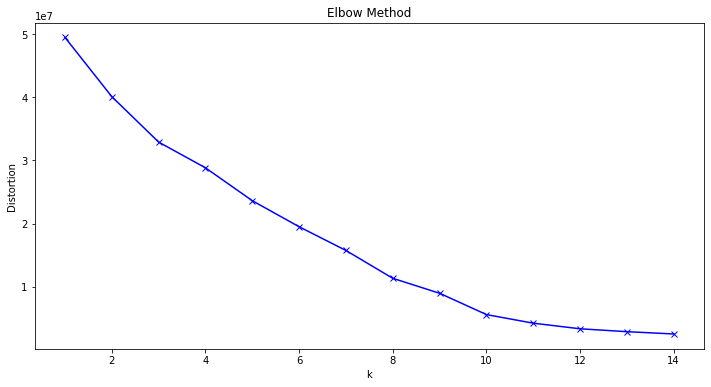

In [152]:
plot_distortions(range(1,15), df_kmeans)

### K means смог поделить на 8-10 классов

In [153]:
kmeanModel = KMeans(n_clusters=8)
kmeanModel.fit(df_kmeans)
clusters = kmeanModel.predict(df_kmeans)

## Visualizing clusters

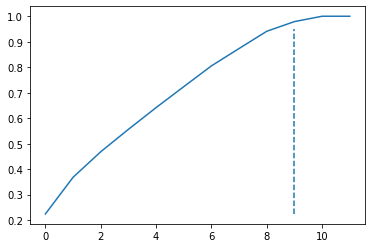

In [154]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_kmeans)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance)
components_threshold = np.argwhere(explained_variance > 0.95).reshape(-1)[0]
plt.vlines(components_threshold, explained_variance.min(), 0.95, linestyle='dashed')
plt.show()

In [156]:
pca = PCA(n_components=components_threshold)
pca_transformed = pca.fit_transform(df_kmeans)

In [158]:
np.sum(pca.explained_variance_ratio_[:2])

0.36810920515015844

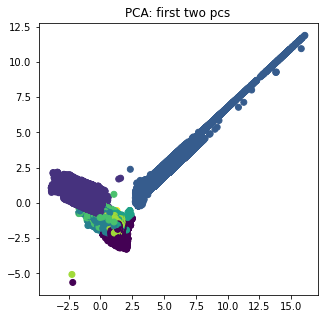

In [163]:
plt.figure(figsize=(5, 5))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=clusters)
plt.title("PCA: first two pcs")
plt.show()

Визуализировать нормально не получилось

### Multicore TSNE

In [ ]:
## Слишком долго обучать
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_jobs=6)
tsne_transformed = tsne.fit_transform(pca_transformed)

In [169]:
ts_kmeans = TimeSeriesKMeans(
    n_clusters=8, 
    metric="softdtw", 
    n_jobs=6, 
    max_iter=1, 
    verbose=1
)
ts_kmeans.fit(df_kmeans)

KeyboardInterrupt: 